### Exercise 7.1

Standard update rule for $n$-step bootstrapping:

$
G_{t:t+n} = R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1}R_{t+n} + \gamma^n V_{t+n-1}(S_{t+n}) = R_{t+1} + \gamma G_{t+1:t+n}
$

$
V_{t+n}(S_t) = V_{t+n-1}(S_t) + \alpha \left[G_{t:t+n} - V_{t+n-1}(S_t) \right]
$

If the estimation doesn't change after from step to step, then $n$-step return is equal to:

$
G_{t:t+n} = R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1}R_{t+n} + \gamma^n V(S_{t+n}) = R_{t+1} + \gamma G_{t+1:t+n}
$

and the $n$-step error is equal to
$
G_{t:t+n} - V(S_t)
$.

TD-error:

$
\delta_t = R_{t+1} + \gamma V(S_{t+1}) - V(S_t)
$

So

\begin{split}
G_t - V(S_t) &= R_{t+1} + \gamma G_{t+1:t+n} - V(S_t) \\
             &= R_{t+1} + \gamma V(S_{t+1}) - V(S_t) - \gamma V(S_{t+1}) + \gamma G_{t+1:t+n} \\
             &= \delta_t + \gamma (G_{t+1:t+n} - V(S_{t+1})) \\
             &= \delta_t + \gamma \delta_{t+1} + \gamma^2 (G_{t+2:t+n} - V(S_{t+2})) \\
             &= \delta_t + \gamma \delta_{t+1} + ... + \gamma^{n-1} \delta_{t+n-1} + \gamma^n(G_{t+n:t+n} - V(S_{t+n})) \\
             &= \sum_{k=0}^{n-1} \gamma^k \delta_{t+k} + \gamma^n(V(S_{t+n}) - V(S_{t+n})) \\
             &= \sum_{k=0}^{n-1} \gamma^k \delta_{t+k}
\end{split}

### Exercise 7.3
Larger random walk task was used, so the episodes are longer. For smaller tasks the cases of larger $n$ (32 and more), would work like Monte Carlo for most of the episodes, so presumably there wouldn't be a clear difference between e.g. $n$ of 64 and 128. $n$-step bootstrapping works better for longer episodes, so smaller task would probably shift the advantage towards smaller $n$. Change in left-side outcome from 0 to -1 makes no difference if the initial estimation is also changed from 0.5 to 0. The only differnce would be the larger gap between the estimation (and the true value) of each two states. 

### Exercise 7.4

Prove that the $n$-step return of Sarsa
$$
G_{t:t+n} = R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1} R_{t+n} + \gamma^n Q_{t+n-1}(S_{t+n}, A_{t+n})
$$

can be written exactly in terms of a novel TD error, as

$$
G_{t:t+n} = Q_{t-1}(S_t, A_t) + \sum_{k=t}^{\min(t+n, T)-1} \gamma^{k-t} \left[R_{k+1} + \gamma Q_k(S_{k+1}, A_{k+1}) - Q_{k-1}(S_k, A_k) \right]
$$

#### Proof
I will show how to reach 1st equation from the 2nd one. I will assume that for $k>T$, $R_k = 0$ and $Q_k(s, a) = 0$, so I can replace $\min(t+n, T)$ with simply $t+n$.


\begin{split}
G_{t:t+n} &= Q_{t-1}(S_t, A_t) + \sum_{k=t}^{t+n-1} \gamma^{k-t} \left[R_{k+1} + \gamma Q_k(S_{k+1}, A_{k+1}) - Q_{k-1}(S_k, A_k) \right] \\
          &= Q_{t-1}(S_t, A_t) + \sum_{k=t}^{t+n-1}\gamma^{k-t}R_{k+1} + \sum_{k=t}^{t+n-1}\gamma^{k-t+1}Q_k(S_{k+1}, A_{k+1}) - \sum_{k=t}^{t+n-1}\gamma^{k-t}Q_{k-1}(S_k, A_k) \\
          &= \sum_{k=t}^{t+n-1}\gamma^{k-t}R_{k+1} + Q_{t-1}(S_t, A_t) + \sum_{k=t}^{t+n-1}\gamma^{k-t+1}Q_k(S_{k+1}, A_{k+1}) - \gamma^0 Q_{t-1}(S_t, A_t) - \sum_{k=t+1}^{t+n-1}\gamma^{k-t}Q_{k-1}(S_k, A_k) \\
          &= \sum_{k=t}^{t+n-1}\gamma^{k-t}R_{k+1} + \sum_{k=t}^{t+n-1}\gamma^{k-t+1}Q_k(S_{k+1}, A_{k+1}) - \sum_{k=t+1}^{t+n-1}\gamma^{k-t}Q_{k-1}(S_k, A_k) \\
          &= \sum_{k=t}^{t+n-1}\gamma^{k-t}R_{k+1} + \gamma^n Q_{t+n-1}(S_{t+n}, A_{t+n}) + \sum_{k=t}^{t+n-2}\gamma^{k-t+1}Q_k(S_{k+1}, A_{k+1}) - \sum_{k=t+1}^{t+n-1}\gamma^{k-t}Q_{k-1}(S_k, A_k) \\
          &= \sum_{k=t}^{t+n-1}\gamma^{k-t}R_{k+1} + \gamma^n Q_{t+n-1}(S_{t+n}, A_{t+n}) + \sum_{k=t+1}^{t+n-1}\gamma^{k-t}Q_{k-1}(S_k, A_k) - \sum_{k=t+1}^{t+n-1}\gamma^{k-t}Q_{k-1}(S_k, A_k) \\
          &= \sum_{k=t}^{t+n-1}\gamma^{k-t}R_{k+1} + \gamma^n Q_{t+n-1}(S_{t+n}, A_{t+n})
\end{split}
Which is exactly the 1st equation.

### Exercise 7.5
Write the pseudocode for the off-policy state-value prediction algorithm described above.

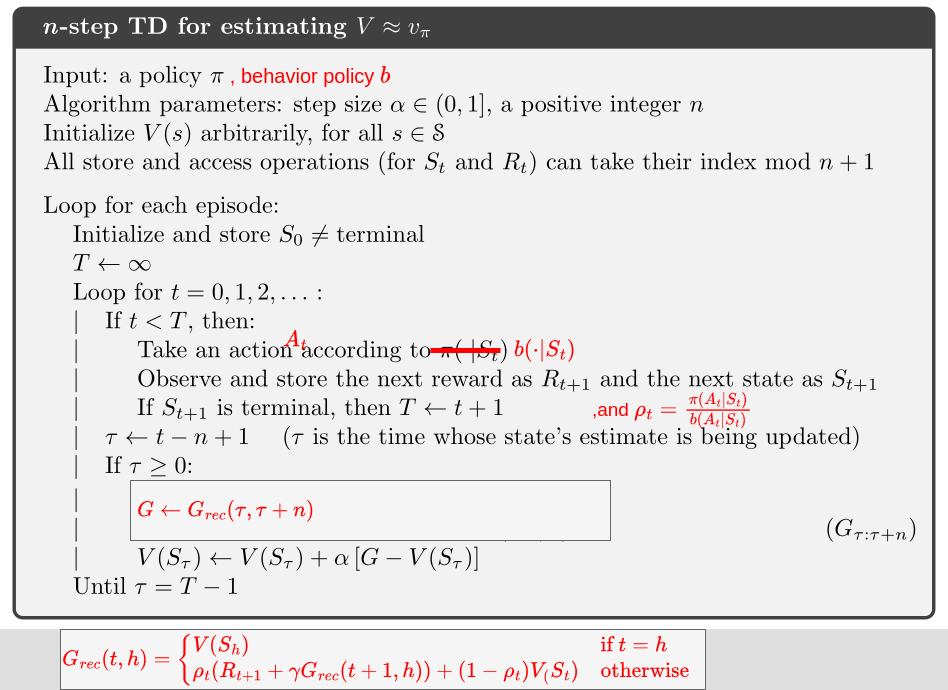

### Exercise 7.6

We want to prove that this:
$$
G_{t:h} = R_{t+1} + \gamma [\rho_{t+1}G_{t+1:h} + \bar{V}_{h-1}(S_{t+1}) - \rho_{t+1}Q_{h-1}(S_{t+1}, A_{t+1})]
$$
has the same expected value (under the behavior policy $b$) as:
$$
G_{t:h}^{\text{plain}} = R_{t+1} + \gamma \rho_{t+1}G_{t+1:h}
$$

Goal:
$$
\mathbb{E}[G_{t:h}] = \mathbb{E}[G_{t:h}^{\text{plain}}]
$$

#### Proof

\begin{split}
\mathbb{E}[G_{t:h}] &= \mathbb{E}[R_{t+1} + \gamma [\rho_{t+1}G_{t+1:h} + \bar{V}_{h-1}(S_{t+1}) - \rho_{t+1}Q_{h-1}(S_{t+1}, A_{t+1})]] \\
        &= \mathbb{E}[R_{t+1}] + \gamma \mathbb{E}[\rho_{t+1}G_{t+1:h}] + \gamma \mathbb{E}[\bar{V}_{h-1}(S_{t+1})] - \gamma \mathbb{E}[\rho_{t+1}Q_{h-1}(S_{t+1}, A_{t+1})] \\
        &= \mathbb{E}[R_{t+1}] + \gamma \mathbb{E}[\rho_{t+1}G_{t+1:h}] + \gamma \left(\mathbb{E}[\bar{V}_{h-1}(S_{t+1})] - \mathbb{E}[\rho_{t+1}Q_{h-1}(S_{t+1}, A_{t+1})] \right) \\
\end{split}

Now we can transform the last term
$$
\mathbb{E}[\rho_{t+1}Q_{h-1}(S_{t+1}, A_{t+1})] = \mathbb{E}\left[\frac{\pi(A_{t+1}|S_{t+1})}{b(A_{t+1}|S_{t+1})} Q_{h-1}(S_{t+1}, A_{t+1}) \right] = \mathbb{E} \left[\sum_{a} b(a, S_{t+1})\frac{\pi(A_{t+1}|S_{t+1})}{b(A_{t+1}|S_{t+1})}  Q_{h-1}(S_{t+1}, a) \right] = \mathbb{E}[\bar{V}_{h-1}(S_{t+1})]
$$

so

\begin{split}
\mathbb{E}[G_{t:h}] &= \mathbb{E}[R_{t+1}] + \gamma \mathbb{E}[\rho_{t+1}G_{t+1:h}] + \gamma \left(\mathbb{E}[\bar{V}_{h-1}(S_{t+1})] - \mathbb{E}[\bar{V}_{h-1}(S_{t+1})] \right) \\
                    &= \mathbb{E}[R_{t+1}] + \gamma \mathbb{E}[\rho_{t+1}G_{t+1:h}] \\
                    &= \mathbb{E}[R_{t+1} + \gamma\rho_{t+1}G_{t+1:h}] \\
                    &= \mathbb{E}[G_{t:h}^{\text{plain}}]
\end{split}

### Exercise 7.7

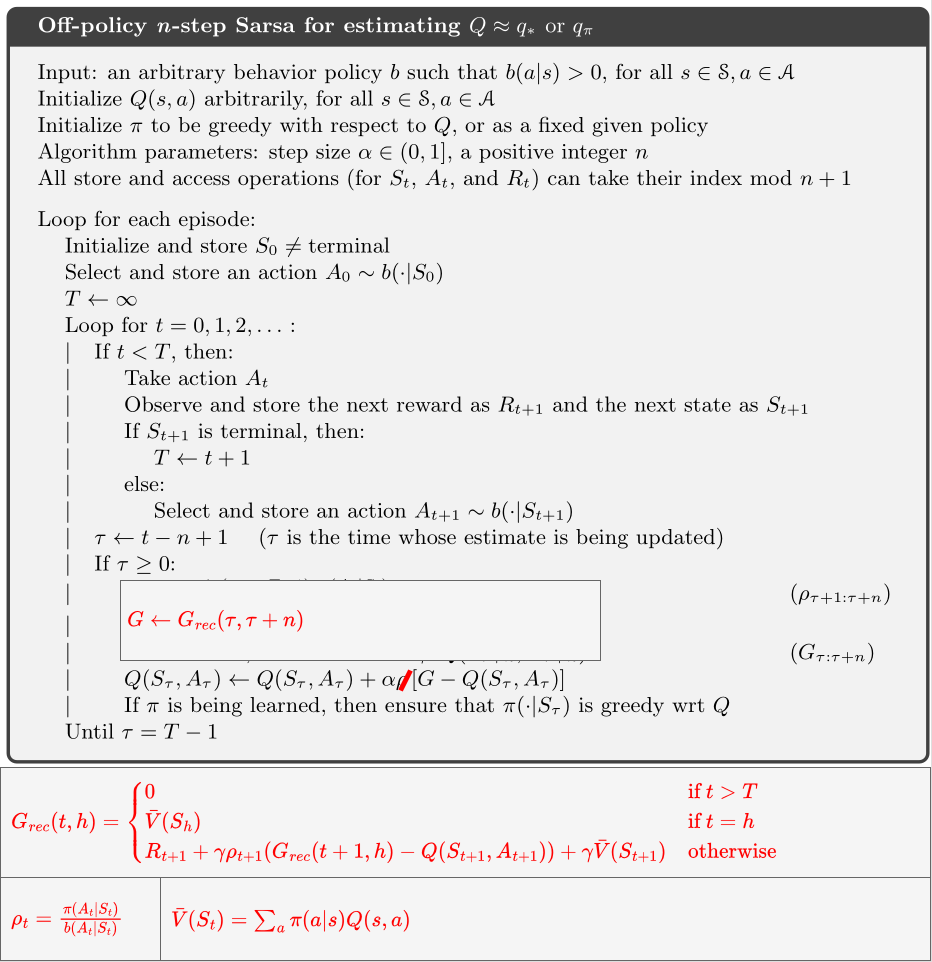

### Exercise 7.8
$n$-step return is:
$$
G_{t:h} = \rho_t(R_{t+1} + \gamma G_{t+1:h}) + (1-\rho_t)V(S_t)
$$
TD-error is:
$$
\delta_t = R_{t+1} + V(S_{t+1}) - V(S_t)
$$

Then

\begin{split}
G_{t:h} - V(S_t) &= \rho_t(R_{t+1} + \gamma G_{t+1:h}) + (1-\rho_t)V(S_t) - V(S_t) \\
                 &= \rho_t(R_{t+1} + \gamma G_{t+1:h} - \rho_t V(S_t)) \\
                 &= \rho_t(R_{t+1} + \gamma [G_{t+1:h} - V(S_{t+1})] + \gamma V(S_{t+1}) - V(S_t)) \\
                 &= \rho_t(R_{t+1} + \gamma V(S_{t+1}) - V(S_t) \gamma [G_{t+1:h} - V(S_{t+1})]) \\
                 &= \rho_t \delta_t + \rho_t \gamma [G_{t+1:h} - V(S_{t+1})] \\
                 &= \rho_t \delta_t + \rho_t \gamma \left[\rho_{t+1} \delta_{t+1} + \rho_{t+1}\gamma[G_{t+2:h} - V(S_{t+2})] \right] \\
                 &= \rho_t \delta_t + \rho_{t:t+1} \gamma \delta_{t+1} + \rho_{t:t+1}\gamma^2 [G_{t+2:h} - V(S_{t+2})] \\
                 ... \\
                 &= \rho_t \delta_t + \rho_{t:t+1} \gamma \delta_{t+1} + ... + \rho_{t:h-2} \gamma^{h-1-t} \delta_{h-2} + \rho_{t:h-1} \gamma^{h-t} [G_{h:h} - V(S_h)] \\
                 &= \rho_t \delta_t + \rho_{t:t+1} \gamma \delta_{t+1} + ... + \rho_{t:h-2} \gamma^{h-1-t} \delta_{h-2} + \rho_{t:h-1} \gamma^{h-t} [V(S_h) - V(S_h)] \\
                 &= \sum_{i=t}^{h-2} \rho_{t:i} \gamma^{i-t} \delta_i
\end{split}

so
$$
G_{t:h} = V(S_t) + \sum_{i=t}^{h-2} \rho_{t:i} \gamma^{i-t} \delta_i
$$

### Exercise 7.9
$n$-step return is:
$$
G_{t:h} = R_{t+1} + \gamma \bar{V}(S_{t+1}) + \gamma \rho_{t+1}(G_{t+1:h} - Q(S_{t+1}, A_{t+1}))
$$
TD-error is:
$$
\delta_t = R_{t+1} + \gamma \bar{V}(S_{t+1}) - Q(S_t, A_t)
$$
where
$$
\bar{V}(S_{t+1}) = \sum_{a} \pi(a | S_{t+1}) Q(S_{t+1, a}) - Q(S_t, A_t)
$$.

Then

\begin{split}
G_{t:h} - Q(S_t, A_t) &= R_{t+1} + \gamma \bar{V}(S_{t+1}) - Q(S_t, A_t) + \gamma \rho_{t+1}(G_{t+1:h} - Q(S_t, A_t)) \\
                      &= \delta_t + \gamma \rho_{t+1}(G_{t+1:h} - Q(S_t, A_t)) \\
                      &= \delta_t + \gamma \rho_{t+1}\left(\delta_{t+1} + \gamma \rho_{t+2}(G_{t+2:h} - Q(S_{t+2}, A_{t+2})) \right) \\
                      &= \delta_t + \gamma \rho_{t+1}\delta_{t+1} + \gamma^2\rho_{t+1:t+2}(G_{t+2:h} - Q(S_{t+2}, A_{t+2})) \\
                      &= \delta_t + \gamma \rho_{t+1}\delta_{t+1} + \gamma^2\rho_{t+1:t+2}(\delta_{t+2} + \gamma \rho_{t+3}(G_{t+3:h} - Q(S_{t+3}, A_{t+3}))) \\
                      &= \delta_t + \gamma \rho_{t+1}\delta_{t+1} + \gamma^2\rho_{t+1:t+2}\delta_{t+2} + \gamma^3\rho_{t+1:t+3}(G_{t+3:h} - Q(S_{t+3}, A_{t+3})) \\
                      &= \delta_t + \gamma \rho_{t+1}\delta_{t+1} + \gamma^2\rho_{t+1:t+2}\delta_{t+2} + ... + \gamma^{h-1}\rho_{t+1:h-1}\delta_{h-1} + \gamma^{h-1}\rho_{t+1:h}(G_{h:h} - Q(S_{h}, A_{h})) \\
                      &= \delta_t + \gamma \rho_{t+1}\delta_{t+1} + \gamma^2\rho_{t+1:t+2}\delta_{t+2} + ... + \gamma^{h-1}\rho_{t+1:h-1}\delta_{h-1} + \gamma^{h-1}\rho_{t+1:h}(Q(S_{h}, A_{h}) - Q(S_{h}, A_{h})) \\
                      &= \delta_t + \sum_{i=t+1}^{h-1}\gamma^{i-t} \rho_{t:i}\delta_i
\end{split}
so
$$
G_{t:h} = Q(S_t, A_t) + \delta_t + \sum_{i=t+1}^{h-1}\gamma^{i-t} \rho_{t:i}\delta_i
$$


### Exercise 7.11
$n$-step tree-backup return is:
$$
G_{t:t+n} = R_{t+1} + \gamma \sum_{a \neq A_{t+1}} \pi (a | S_{t+1})Q(S_{t+1}, a) + \gamma \pi(A_{t+1} | S_{t+1}) G_{t+1:t+n}
$$

We need to prove that it can be written as a sum of expectation-based TD errors:
$$
G_{t:t+n} = Q(S_t, A_t) + \sum_{k=t}^{\min(t+n-1, T-1)} \delta_k \prod_{i=t+1}^{k} \gamma \pi(A_i | S_i)
$$
where $\delta_t = R_{t+1} + \gamma \bar{V}(S_{t+1}) - Q(S_t, A_t)$ and $\bar{V}(S_{t+1}) = \sum_{a} \pi (a | S_{t+1})Q(S_{t+1}, a)$


#### Proof

\begin{split}
G_{t:t+n} &= R_{t+1} + \gamma \sum_{a \neq A_{t+1}} \pi (a | S_{t+1})Q(S_{t+1}, a) + \gamma \pi(A_{t+1} | S_{t+1}) G_{t+1:t+n} \\
          &= R_{t+1} + \gamma \bar{V}(S_{t+1}) - \gamma \pi (A_{t+1}|S_{t+1})Q(S_{t+1}, A_{t+1}) + \gamma \pi(A_{t+1} | S_{t+1}) G_{t+1:t+n} \\
          &= R_{t+1} + \gamma \bar{V}(S_{t+1}) - Q(S_t, A_t) + Q(S_t, A_t) + \gamma \pi(A_{t+1} | S_{t+1}) [G_{t+1:t+n} - Q(S_{t+1}, A_{t+1}) ] \\
          &= \delta_t + Q(S_t, A_t) + \gamma \pi(A_{t+1} | S_{t+1}) [G_{t+1:t+n} - Q(S_{t+1}, A_{t+1}) ]
\end{split}

Now we move $Q(S_t, A_t)$ to the left side

\begin{split}
G_{t:t+n} - Q(S_t, A_t) &= \delta_t + \gamma \pi(A_{t+1} | S_{t+1}) [G_{t+1:t+n} - Q(S_{t+1}, A_{t+1})] \\
                        &= \delta_t + \gamma \pi(A_{t+1} | S_{t+1}) \left[\delta_{t+1} + \gamma \pi (A_{t+2}|S_{t+2})[G_{t+2:t+n} - Q(S_{t+2}, A_{t+2})] \right] \\
                        &= \delta_t + \delta_{t+1}\gamma \pi(A_{t+1} | S_{t+1}) + \left(\prod_{i=t+1}^{t+2} \gamma \pi (A_i|S_i)\right)[G_{t+2:t+n} - Q(S_{t+2}, A_{t+2})]\\
                        &\vdots\\
                        &= \sum_{k=t}^{\min(t+n-1, T-1)} \delta_k \prod_{i=t+1}^{k} \gamma \pi(A_i | S_i)
\end{split}

so
$$
G_{t:t+n} = Q(S_t, A_t) + \sum_{k=t}^{\min(t+n-1, T-1)} \delta_k \prod_{i=t+1}^{k} \gamma \pi(A_i | S_i)
$$